# Analyzing Ford GoBike Data for (December 2019)

### Introduction:

- Ford GoBike is a bicycle sharing system in the San Francisco Bay Area, California. Beginning of operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.      The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration. Single rides cost 2 dollars  per trip, day passes cost 10 dollars per day, and memberships cost 15 dollars per month or 149 dollars per year.


- **Why analyzing this data set?**
- What interests me about this data set is to see who use this system the most? when its used the most during the day and week?   the age/gender of the customers who use it the most?




- I choose to analyse (December 2019) data set because December is filled with public holidays specially in the last two weeks of it. And December 2019 data set its the last data set available before the COVID 19 pandemic went worldwide.

### Data Gathering 

In [2]:
#  libraries to be used in this project:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile


%matplotlib inline

In [8]:
# unzipping the data set file 
with zipfile.ZipFile('201912-baywheels-tripdata.csv.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
df = pd.read_csv('201912-baywheels-tripdata.csv')

C:\Users\Malik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Assessing Data

In [35]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,349.0,Howard St at Mary St,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,410.0,Illinois St at Cesar Chavez St,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,6.0,The Embarcadero at Sansome St,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,6.0,The Embarcadero at Sansome St,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),363.0,Salesforce Transit Center (Natoma St at 2nd St),10219,Customer,NaN
...,...,...,...,...,...,...,...,...,...,...
150097,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,NaN,NaN,719651,Subscriber,app
150098,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,NaN,NaN,655411,Subscriber,app
150099,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,NaN,NaN,936881,Subscriber,app
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,NaN,NaN,397539,Subscriber,app


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN


In [26]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,150102.000000,129083.000000,150102.000000,150102.000000,128755.000000,150102.000000,150102.000000,150102.000000
mean,790.649752,166.216884,37.734527,-122.324810,157.234841,37.729180,-122.305736,98479.011719
std,2925.944647,139.504738,0.149011,0.167988,137.800047,0.480472,1.490201,217369.156650
min,60.000000,3.000000,37.268049,-122.513816,3.000000,0.000000,-122.513824,12.000000
25%,359.000000,52.000000,37.764802,-122.415674,38.000000,37.765026,-122.411726,9496.000000
50%,570.000000,116.000000,37.776664,-122.398279,109.000000,37.777053,-122.397086,11025.000000
75%,886.000000,266.000000,37.792251,-122.275698,252.000000,37.794130,-122.279352,12727.000000
max,912110.000000,498.000000,37.880222,-121.813425,498.000000,37.880222,0.000000,999941.000000


### Cleaning Data

In [34]:
df.shape

(150102, 10)

In [29]:
# Checking duplicates
df.duplicated().sum()

0

In [5]:
# Dropping unwanted columns
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace = True)

In [6]:
# Change those colmns to timestamps
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
# Change those colmns to objects
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [8]:
# Change those colmns to categories
df['user_type'] = df['user_type'].astype('category')
df['rental_access_method'] = df['rental_access_method'].astype('category')

In [9]:
# Adding start time weekday column
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

# Adding start time hour column
df['start_time_hour'] = df['start_time'].dt.hour

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   duration_sec          150102 non-null  int64         
 1   start_time            150102 non-null  datetime64[ns]
 2   end_time              150102 non-null  datetime64[ns]
 3   start_station_id      150102 non-null  object        
 4   start_station_name    129087 non-null  object        
 5   end_station_id        150102 non-null  object        
 6   end_station_name      128757 non-null  object        
 7   bike_id               150102 non-null  object        
 8   user_type             150102 non-null  category      
 9   rental_access_method  27681 non-null   category      
 10  start_time_weekday    150102 non-null  object        
 11  start_time_hour       150102 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(6)
mem

In [66]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,start_time_weekday,start_time_hour
12539,572,2019-12-23 19:37:43.151,2019-12-23 19:47:15.303,245.0,Downtown Berkeley BART,265.0,Ninth St at Parker St,2717,Customer,NaN,Mon,19
242,913,2019-12-31 20:21:10.984,2019-12-31 20:36:24.857,43.0,San Francisco Public Library (Grove St at Hyde...,74.0,Laguna St at Hayes St,576,Customer,NaN,Tue,20
62569,517,2019-12-12 17:35:38.552,2019-12-12 17:44:16.053,121.0,Mission Playground,124.0,19th St at Florida St,10725,Customer,NaN,Thu,17
127157,645,2019-12-13 13:24:31.000,2019-12-13 13:35:17.000,nan,NaN,nan,NaN,820513,Customer,app,Fri,13
33436,737,2019-12-18 08:09:11.060,2019-12-18 08:21:28.103,267.0,Derby St at College Ave,171.0,Rockridge BART Station,3010,Customer,NaN,Wed,8


### Univariate Exploration
- **Why this visualization was created?** 
- In this part we will be generally exploring the main points in the data set, which is (duration_sec, start_time_hour, start_time_weekday) so we can see which points need further investigations to lead us for a key insight.



**Points of interest in univariate exploration**

- What is the duration of usage in seconds?
- What is the peek weekdays?
- What is the the peek hours?

In [67]:
df['duration_sec'].describe()

count    150102.000000
mean        790.649752
std        2925.944647
min          60.000000
25%         359.000000
50%         570.000000
75%         886.000000
max      912110.000000
Name: duration_sec, dtype: float64

- Transformation was made here to dive deeper and see the points of interest in the duration_sec column. I set the ma to (5000 seconds) which equal to 83 minutes. As we can see from the histogram the trips made was not longer than 2000 sec (33 min), with peek arond 900 sec (15 min) per trip with very trips between 3000 and 4000 seconds.

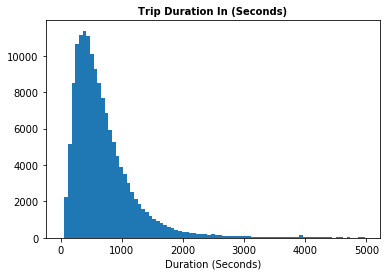

In [30]:
bins = np.arange(0, 5000, 60)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlabel('Duration (Seconds)');
plt.title("Trip duration in (Seconds)".title(), fontsize = 10, weight = 'bold');

- As we can see from the chart the peak hours between 8 to 9 a.m. then followed by similar peak volume between 4 to 6 p.m. then the trips decreases as we can see from the plot.

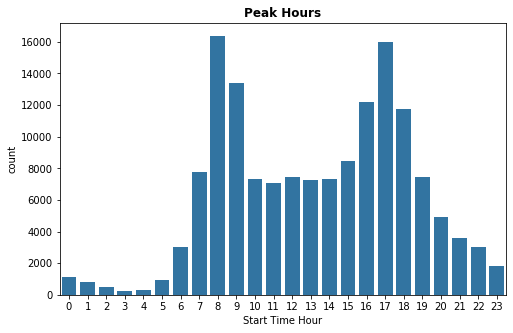

In [47]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_time_hour', color = base_color);
plt.title('Peak Hours'.title(), fontsize = 12, weight = 'bold');
plt.xlabel('Start Time Hour');

- The plot shows the peak days throughout a week with most peak days are Monday & Tuesday, then followed by little lower peak on Thursday & Friday.

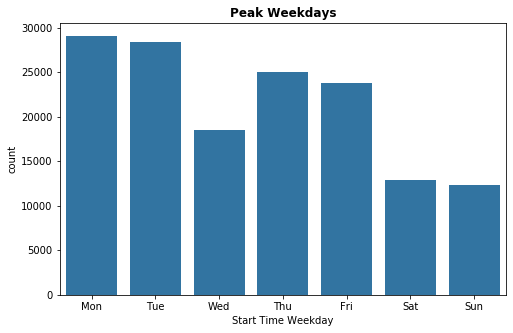

In [48]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
start_time_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df, x = 'start_time_weekday', color = base_color, order = start_time_order);
plt.title('Peak Weekdays'.title(), fontsize = 12, weight = 'bold');
plt.xlabel('Start Time Weekday');

### Bivariate Exploration
- **Why this visualization was created?** 
- In the bivariate exploration we will be analysing two variables in each plot, so we can see if there is a relationship between the variables we analysed, and to see what the data will reveal to us from relationships between the variables.  


- Adding another variable for our exploration (user_type), is there a relationship between the variables? 
- which user type uses the bicycle sharing system more often? will it lead to find a key insight for the analysis?

### The relationship between user_type and start_time_weekday

- The plot shows that Subscribers are most likely to use the system more throughout the weekdays, but on (Sat, Sun, Wed) we can see similarity in usage for both users type (Subscribers & Customers) with not very much diffence for Subscribers, which might need more exploration to see which user type is using the system more frquently.

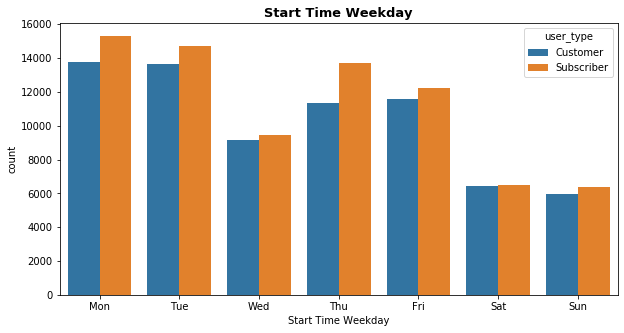

In [34]:
plt.figure(figsize = [10, 5])
start_time_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', order = start_time_order);
plt.title('Start Time Weekday'.title(), fontsize = 13, weight = 'bold');
plt.xlabel('Start Time Weekday');

### The relationship between user_type and start_time_hour
- The plot shows that subscribers are most likely to use the system throughout the day, with similarity in usage for both users type (Subscribers & Customers) on 11 p.m., the usage throughout the 24 hours shows little more use to the system from the subscribers user.
- Will it lead to different results of user type usage when exploring the user type with another variable from the data set?

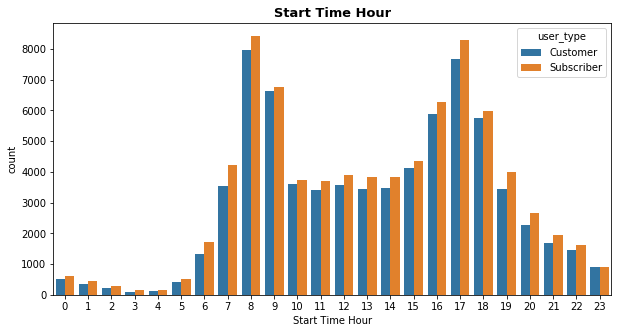

In [40]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type');
plt.title('Start Time Hour'.title(), fontsize = 13, weight = 'bold');
plt.xlabel('Start Time Hour');

###  The relationship between user_type and duration_sec

- The mean shows that user type Customer trip duration is more than the Suscribers. which is shows a reationship between duration in seconds and user type.

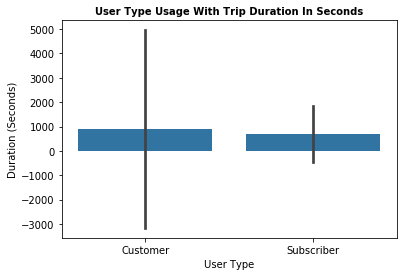

In [43]:
bins = np.arange(0, 5000, 60)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color, ci = 'sd');
plt.title('User Type usage With Trip Duration in Seconds'.title(), fontsize = 10, weight = 'bold');
plt.xlabel('User Type');
plt.ylabel('Duration (Seconds)');

### The relationship between user_type and duration_sec 
- The average for both users type (Subscribers & Customers) with higher trip duration for Customers. Customer trip duration 900 seconds (15 min) for subscriber its 700 seconds (11.6 min), the difference is 3.4 min for the customer.
- That is probably because the Subscribers are using it for short trips such as work or school, on the other hand the Customers are using it more for longer trips around the bay area.

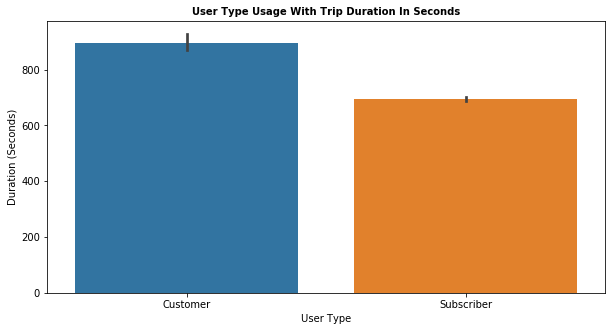

In [70]:
plt.figure(figsize = [10, 5])

sb.barplot(data = df, x = 'user_type', y = 'duration_sec');
plt.title('User Type usage With Trip Duration in Seconds'.title(), fontsize = 10, weight = 'bold');
plt.xlabel('User Type');
plt.ylabel('Duration (Seconds)');

### Multivariate Exploration
**Why this visualization was created?**
- Creating a plots of the relationship between user_type, duration_sec, start_time_weekday, and start_time_hour. I see that user_type had the clearest interactions with duration_sec variable. We will explor more when testing three variables toghter in order to get clear image about the user type. 


- How clearly does this show up in a multivariate visualization when i add duration_sec variable? 

### The relationship between user_type, duration_sec and start_time_weekday
- The plot shows that Subscribers are most likely to use it throughout the weekdays, but on (Sat, Sun, Wed) we can see similarity in usage for both users type (Subscribers & Customers) with little difference for subscribers. lets dig deeper to have clear image about the user type usage.

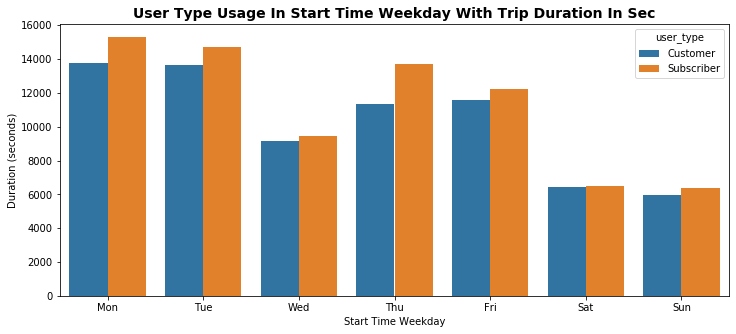

In [72]:
plt.figure(figsize = [12, 5])
start_time_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', order = start_time_order);
plt.title('user type usage in start time weekday with trip duration in sec'.title(), fontsize = 14, weight = 'bold');
g.set_xlabel('Start Time Weekday')
g.set_ylabel('Duration (seconds)');


### The relationship between user_type, duration_sec and start_time_weekday 
- As we can see the average for both users type (Subscribers & Customers) with higher trip duration for Customers in start_time_weekday.

- The results support our findings in (Bivariate Exploration) that probably the Subscribers are using it for short trips such as work or school, and Customers are using it more for longer trips around the bay area, with higher duration of usage for the customers user type in all the days specially on Sat and Sun.

- Does the results apply in a same way with another variable in the data set?

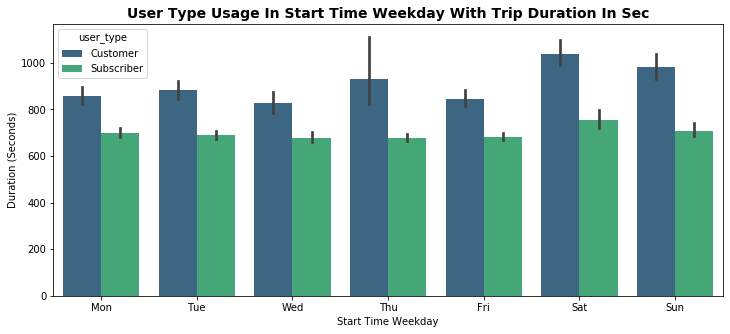

In [62]:
plt.figure(figsize = [12, 5])
start_time_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.barplot(data = df, x = 'start_time_weekday', y = 'duration_sec', hue = 'user_type', 
                  dodge = 0.5, palette = 'viridis', order = start_time_order)

plt.xlabel('Start Time Weekday')
plt.ylabel('Duration (Seconds)')
plt.title("user type usage in start time weekday with trip duration in sec".title(),
         fontsize = 14, weight = 'bold')


plt.show();

### The relationship between user_type, duration_sec and start_time_hour 
- This prove our findings because even on the start_time_hour (24 hours) customers are more likely to use it with higher trip duration in sec as we can see, which prove that the customers are using the bicycle sharing system more than the subscribers in duration as the plot shows.

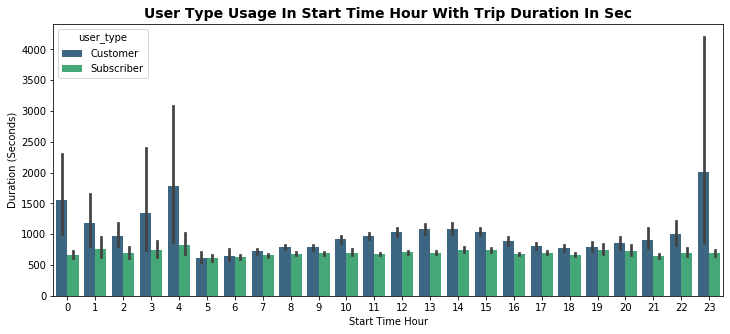

In [68]:
plt.figure(figsize = [12, 5])

ax = sb.barplot(data = df, x = 'start_time_hour', y = 'duration_sec', hue = 'user_type', 
                  dodge = 0.5, palette = 'viridis')

plt.xlabel('Start Time Hour')
plt.ylabel('Duration (Seconds)')
plt.title("user type usage in start time hour with trip duration in sec".title(),
         fontsize = 14, weight = 'bold')

plt.show();

### Conclusion

- In the bivariate exploration step we saw the the user type shows that subscribers are using more frquently in start_time_hour and in start_time_weekday, when we plotted user type and duration_sec we saw that customers trip duration_sec set to be higher than the subscribers. Which lead s to do further exploration in the multivariate stage, searching for a relationship between user_type, duration_sec, start_time_weekday, and start_time_hour. we saw that user_type had the clearest interactions with duration_sec variable, which we explor more when testing three variables toghter in order to get clear image about the user type, and the results showed us that the average for both users type (Subscribers & Customers) with higher trip duration for Customers in start_time_weekday, even on the start_time_hour customers are more likely to use it with higher trip duration in sec as we can see, which prove that the customers are using the bicycle sharing system more than the subscribers in duration_sec as the plots showed us. That lead us for or key insight that without further exploration we will not reach this results as the some plots showed that the subscribers are using it more on daily and weekly basis but when we added a three varbiables specially duration_sec with user_type against start_time_weekday or start_time_hour we clearly can see that the customer are using it with higher duration in seconds. Customer trip duration 900 seconds (15 min) for subscriber its 700 seconds (11.6 min), the difference is 3.4 min for the customer. 

### Limitations 

- In the data set we have there is no gender or age columns in our data, that might have help us for our exploration specially in start_time_hour and start_time_weekday so we can know the age of the rider and the gender so it can lead us to do further investigations in or data and find more key insights.

### References

- https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/495fe81e-ebe8-4d10-a4a2-e85fe01565bd/concepts/469d2cf9-8e2b-42e3-977b-4614caf320d0

- https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7

- https://knowledge.udacity.com

- https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib